In [3]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
from tqdm import tqdm
import ast

#loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

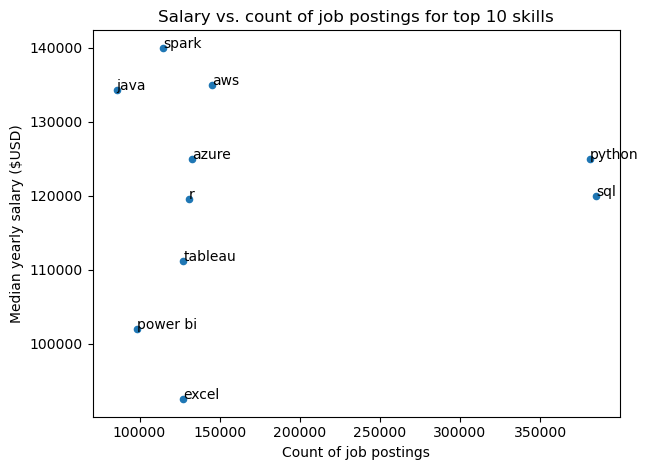

In [ ]:
df[df['job_title_short'] == 'Data Analyst']

df_exploded = df.explode('job_skills')
skill_stat= df_exploded.groupby('job_skills').agg(
    skill_count=('job_skills','count'),
    median_salary=('salary_year_avg','median')
)
skills_stats = skill_stat.sort_values(by='skill_count',ascending=False).head(10)
skills_stats.plot(kind='scatter',x='skill_count',y='median_salary')
plt.xlabel('Count of job postings')
plt.ylabel('Median yearly salary ($USD)')
plt.title('Salary vs. count of job postings for top 10 skills')
plt.tight_layout()


for i, txt in enumerate(skills_stats.index):
    plt.text(skills_stats['skill_count'].iloc[i],skills_stats['median_salary'].iloc[i],txt)
    
plt.show()


In [26]:
skills_stats

,skill_count,median_salary
job_skills,,
sql,384849,120000.0
python,380909,125000.0
aws,145381,135000.0
azure,132527,125000.0
r,130892,119550.0
tableau,127213,111175.0
excel,127018,92500.0
spark,114609,140000.0
power bi,98147,102000.0
